In [3]:
import pandas as pd
wcm=pd.read_csv(r"C:\Users\DEV\Desktop\project\WorldCupMatches.csv")
wcp=pd.read_csv(r"C:\Users\DEV\Desktop\project\WorldCupMatches.csv")
wc=pd.read_csv(r"C:\Users\DEV\Desktop\project\WorldCupMatches.csv")

In [5]:
wcp = wcp.dropna()
wc = wc.dropna()
wcm = wcm.dropna()
wc = wc.replace('Germany FR', 'Germany')
wcp = wcp.replace('Germany FR', 'Germany')
wcm = wcm.replace('Germany FR', 'Germany')
wcm['Stadium'] = wcm['Stadium'].str.replace('Maracana - Estadio Jornalista Mario Filho','Maracanã Stadium')
                                            

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
winner=wc["Winner"] 
runners_up=wc["Runners-Up"] 
winner_count=pd.DataFrame.from_dict(winner.value_counts()) 
runners_up_count=pd.DataFrame.from_dict(runners_up.value_counts()) 
overall=winner_count.join(runners_up_count, how='outer') 
overall=overall.fillna(0) 
overall.columns=['WINNER', 'RUNNERS_UP'] 
overall=overall.astype('int64') 
overall=overall.sort_values(by=['WINNER', 'RUNNERS_UP']) 
overall.plot(y=['WINNER', 'RUNNERS_UP'], kind="bar", color =['red','blue'], align='center', figsize=(20, 10), grid=True)
plt.xlabel('Countries') 
plt.ylabel('Number of times reached final') 
plt.title('Number of times any team reaching final') 
plt.show() 



KeyError: 'Winner'

Text(0, 0.5, 'Goals')

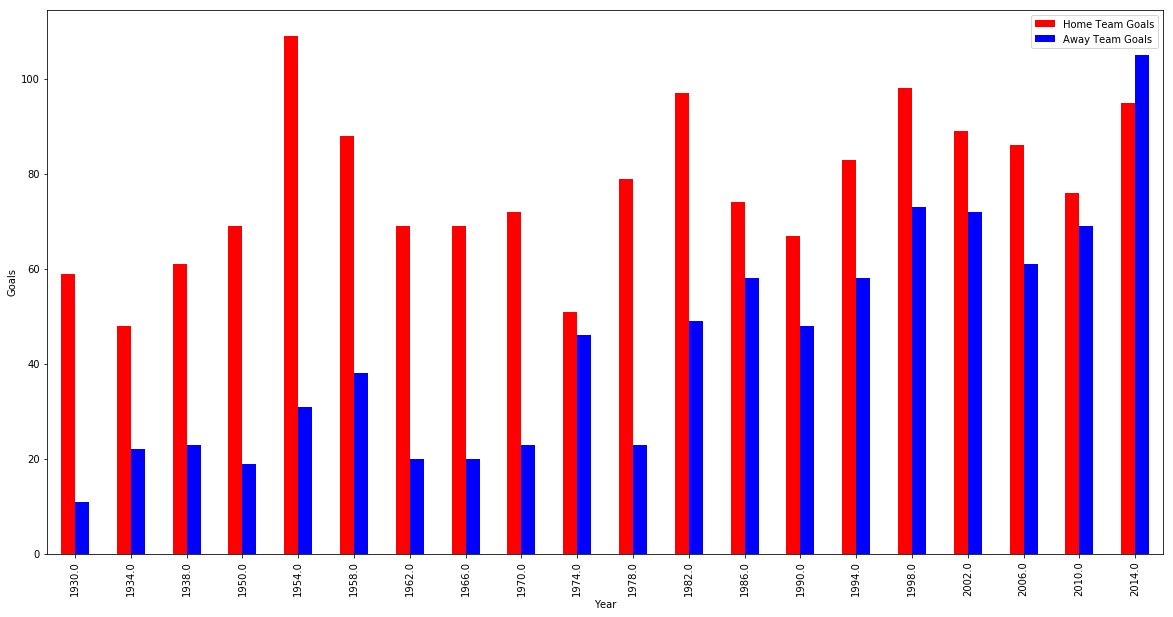

In [9]:
home_team_goal=wcm.groupby('Year')
away_team_goal=wcm.groupby('Year')
home_vs_away_team_goal=home_team_goal['Home Team Goals', 'Away Team Goals'].sum()
home_vs_away_team_goal.plot(y=['Home Team Goals', 'Away Team Goals'], kind="bar", color=['red', 'blue'], align='center', figsize=(20, 10))
plt.ylabel('Goals')

Text(0, 0.5, 'Attendance')

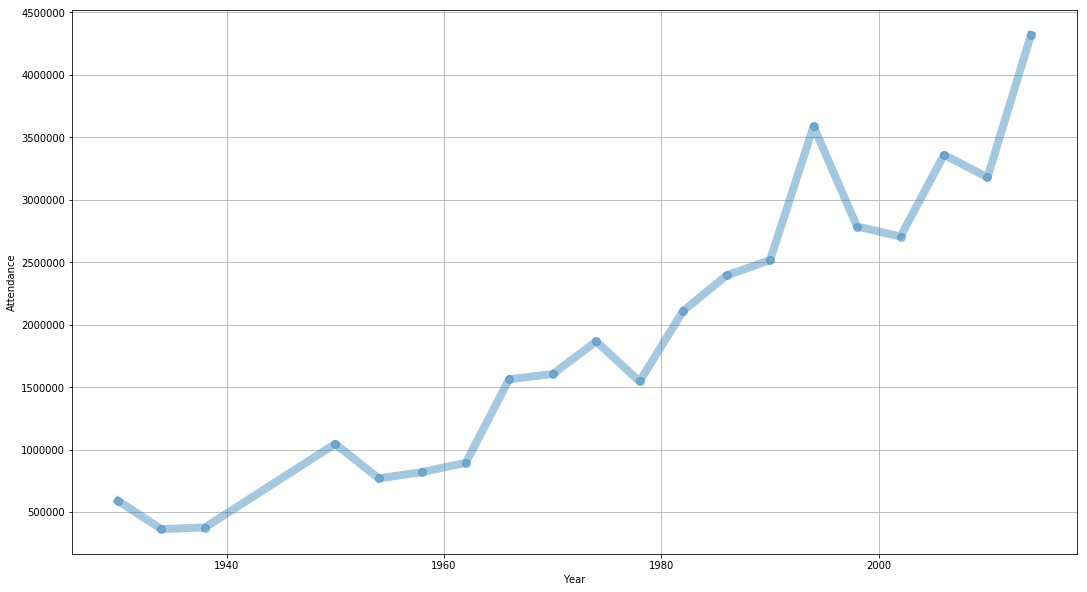

In [11]:
home_and_away_team_goal_vs_attendance=home_team_goal['Attendance'].sum()
home_and_away_team_goal_vs_attendance.plot(y=['Attendance'], linestyle='solid',
marker='o', figsize=(18,10), linewidth=8, alpha=0.4, markersize=8, markerfacecoloralt='red', grid=True)
plt.ylabel('Attendance')

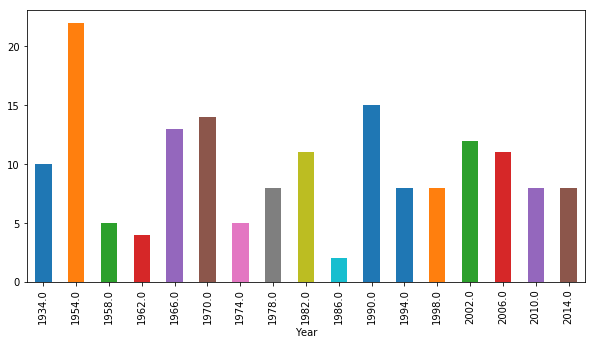

In [12]:
germany_home=wcm.groupby('Home Team Name').get_group('Germany')[['Year', 'Home Team Goals']]
germany_away=wcm.groupby('Away Team Name').get_group('Germany')[['Year', 'Away Team Goals']]
germany_home_goal=germany_home.groupby('Year')['Home Team Goals'].sum()
germany_away_goal=germany_away.groupby('Year')['Away Team Goals'].sum()
germany_home_goal.plot.bar(figsize=(10,5))

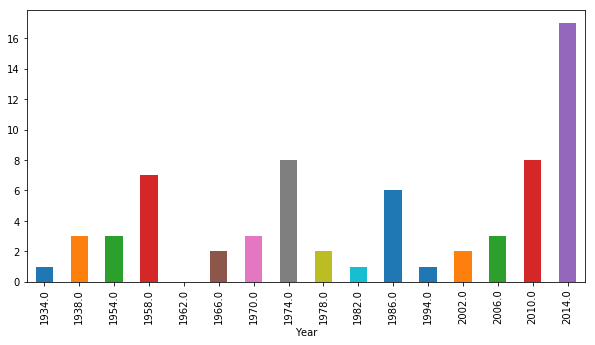

In [13]:
germany_away_goal.plot.bar(figsize=(10,5))

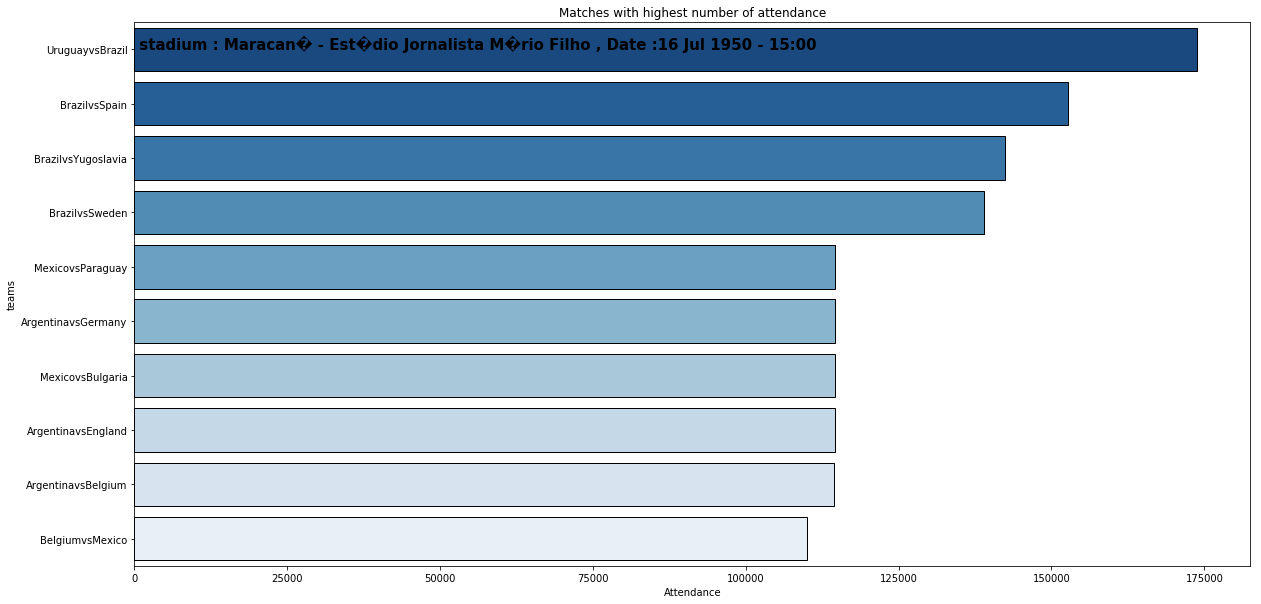

In [16]:
import seaborn as sns
att=wcm.sort_values(by='Attendance', ascending=False)[:10]
att=att[['Year', 'Datetime','Stadium', 'City', 'Home Team Name', 'Home Team Goals', 'Away Team Name', 'Attendance']]
att['vs_team']=att["Home Team Name"] + 'vs' + att["Away Team Name"]
plt.figure(figsize=(20,10))
ax=sns.barplot(x=att['Attendance'], y=att['vs_team'], palette='Blues_r', linewidth = 1,edgecolor="k"*len(att))
plt.ylabel('teams')
plt.xlabel('Attendance')
plt.title('Matches with highest number of attendance')
for i,j in enumerate(' stadium : '+att['Stadium']+' , Date :' + att['Datetime']):
 ax.text(1,i,j,fontsize = 15,color='black',weight = 'bold')
 plt.show()


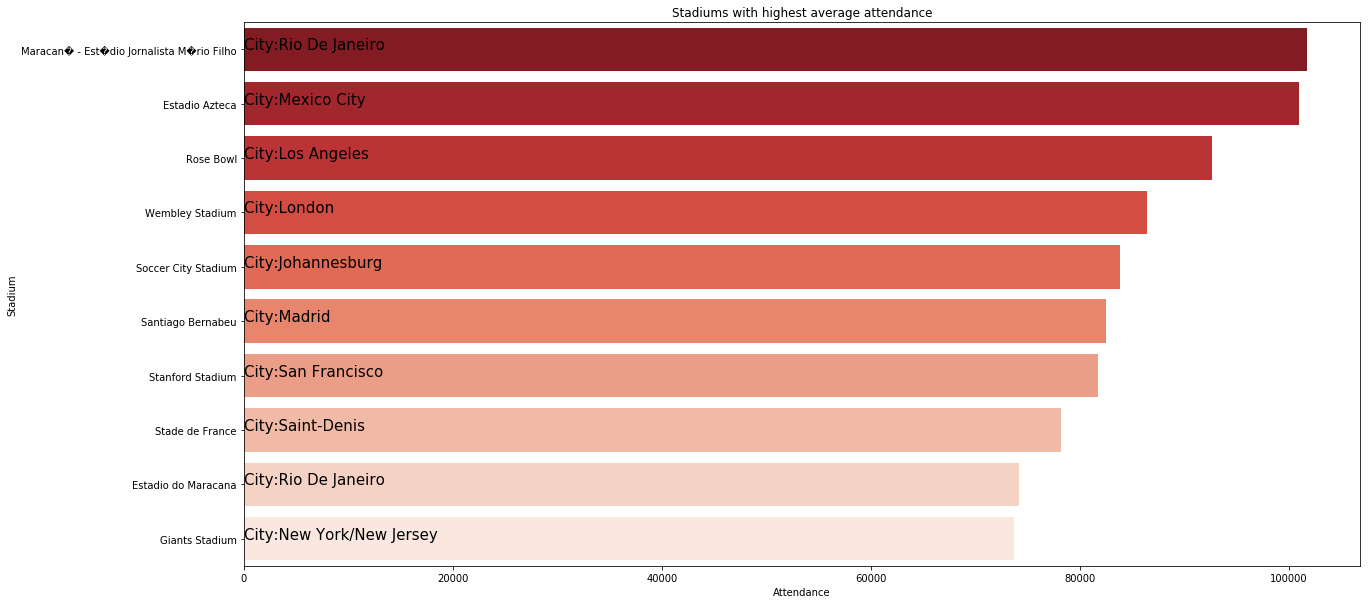

In [17]:
avg_std=wcm.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index().sort_values(by='Attendance', ascending=False)[:10]
plt.figure(figsize=(20,10))
ax=sns.barplot(x=avg_std['Attendance'], y=avg_std['Stadium'], palette='Reds_r')
for i,j in enumerate('City:' + avg_std['City'][:10]):ax.text(1,i,j,fontsize=15)
plt.title('Stadiums with highest average attendance')
plt.show()

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\DEV\Desktop\project\FIFA 2018 Statistics.csv")
numerical_features = data.select_dtypes(include = [np.number]).columns
categorical_features = data.select_dtypes(include= [np.object]).columns
print(numerical_features)
print(categorical_features)
var1 = ['Goal Scored', 'On-Target', 'Corners', 'Attempts', 'Free Kicks', 'YellowCard', 'Red', 'Fouls Committed']
var1.append('Man of the Match')
sns.pairplot(data[var1], hue = 'Man of the Match', palette = 'husl')
plt.show()
Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target','Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves','Pass Accuracy %', 'Passes', 'Distance Covered (Kms)','Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red', '1st Goal','Goals in PSO', 'Own goals', 'Own goal Time'],dtype='object')
Index(['Date', 'Team', 'Opponent', 'Man of the Match', 'Round', 'PSO'], dtype='object')


Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red', '1st Goal',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')
Index(['Date', 'Team', 'Opponent', 'Man of the Match', 'Round', 'PSO'], dtype='object')


KeyError: "['YellowCard'] not in index"

Text(0.5, 1.0, 'Total goal attempts by teams')

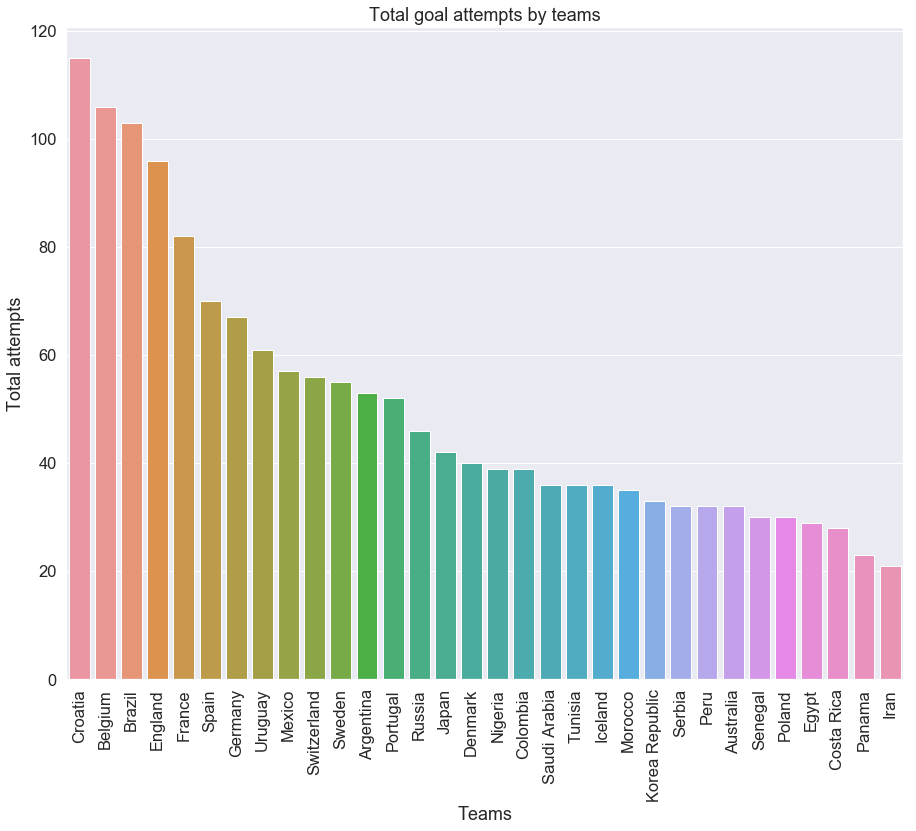

In [23]:
attempts=data.groupby('Team')['Attempts'].sum().reset_index().sort_values(by=('Attempts'),ascending=False)
plt.figure(figsize = (15, 12), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Attempts", data=attempts)
plot1.set_xticklabels(attempts['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total attempts')
plot1.set_title('Total goal attempts by teams')

Text(0.5, 1.0, 'Mean ball possession')

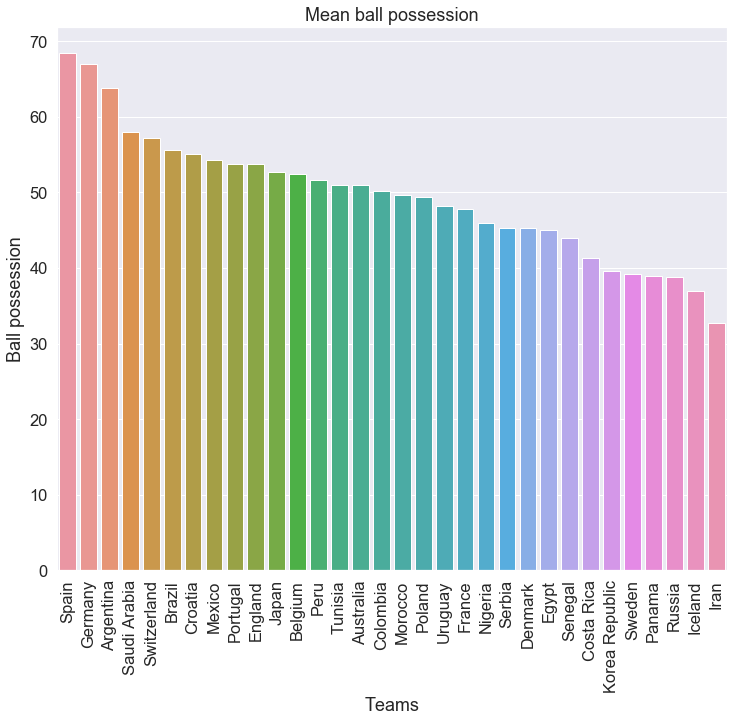

In [24]:
ball_possession=data.groupby('Team')['Ball Possession %'].mean().reset_index().sort_values(by=('Ball Possession %'),ascending=False)
plt.figure(figsize = (12, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Ball Possession %", data = ball_possession)
plot1.set_xticklabels(ball_possession['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Ball possession')
plot1.set_title('Mean ball possession')


Text(0.5, 1.0, 'Most Man of the Match awards')

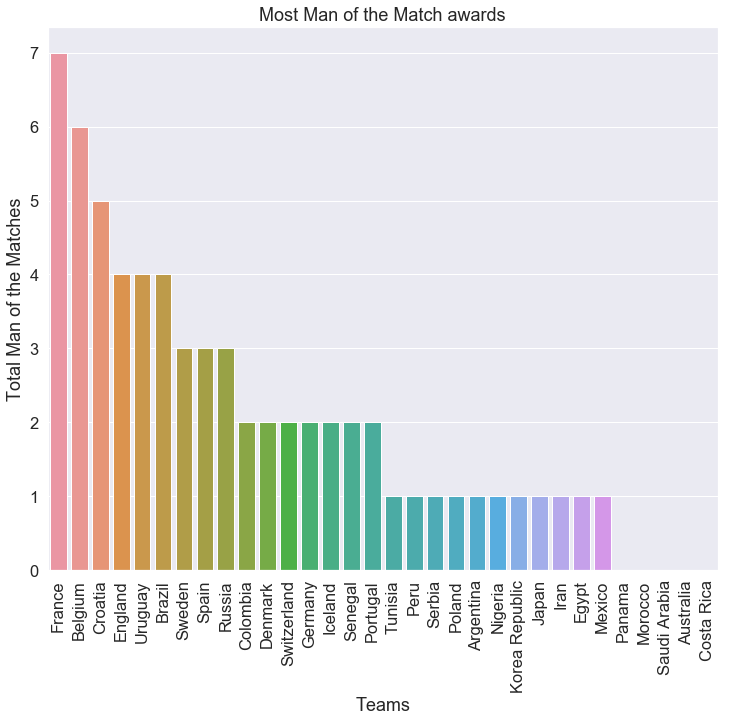

In [25]:
mom_1={'Man of the Match':{'Yes':1,'No':0}}
data.replace(mom_1,inplace=True)
data['Man of the Match']=data['Man of the Match'].astype(int)
mom=data.groupby('Team')['Man of the Match'].sum().reset_index().sort_values(by=('Man of the Match'),ascending=False)
plt.figure(figsize = (12, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Man of the Match", data=mom)
plot1.set_xticklabels(mom['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total Man of the Matches')
plot1.set_title('Most Man of the Match awards')

Text(0.5, 1.0, 'Total On-Target, Off-Target and Blocked attempts by teams')

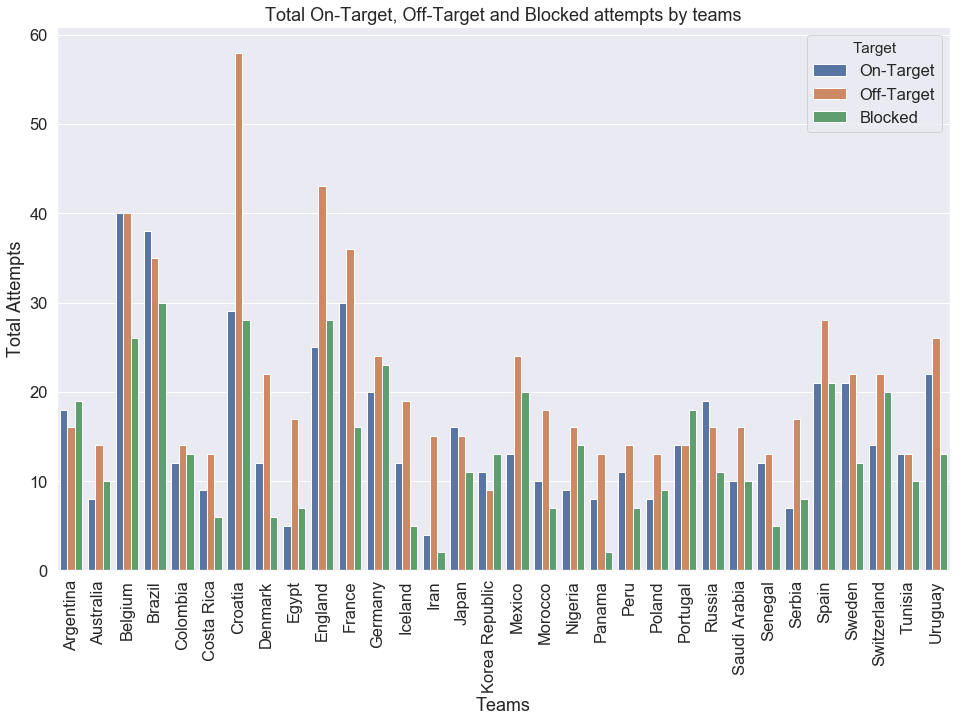

In [26]:
group_attempt = data.groupby('Team')['On-Target','Off-Target','Blocked'].sum().reset_index()
group_attempt_sorted = group_attempt.melt('Team', var_name='Target', value_name='Value')
plt.figure(figsize = (16, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Value", hue="Target", data=group_attempt_sorted)
plot1.set_xticklabels(group_attempt_sorted['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total Attempts')
plot1.set_title('Total On-Target, Off-Target and Blocked attempts by teams')

Text(0.5, 1.0, 'Most Saves')

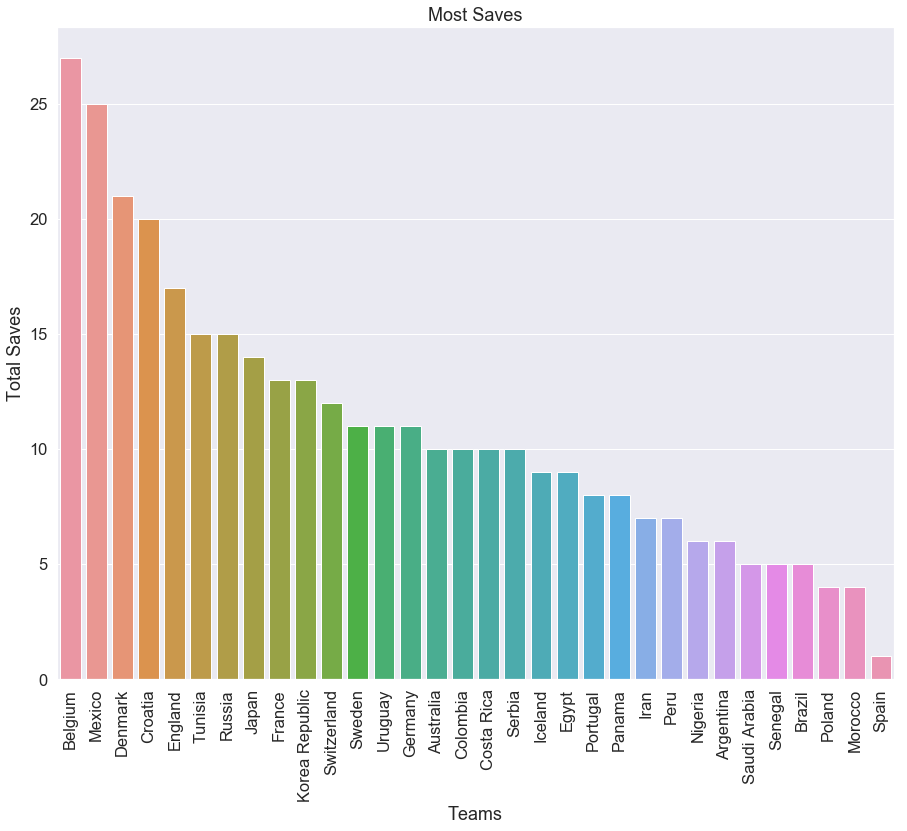

In [27]:
saves=data.groupby('Team')['Saves'].sum().reset_index().sort_values(by=('Saves'),ascending=False)
plt.figure(figsize = (15,12), facecolor = None)
sns.set_style("darkgrid")
plot1 = sns.barplot(x="Team", y="Saves", data=saves)
plot1.set_xticklabels(saves['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total Saves')
plot1.set_title('Most Saves')

Text(0.5, 1.0, 'Total Corners, free kicks and offsides for teams')

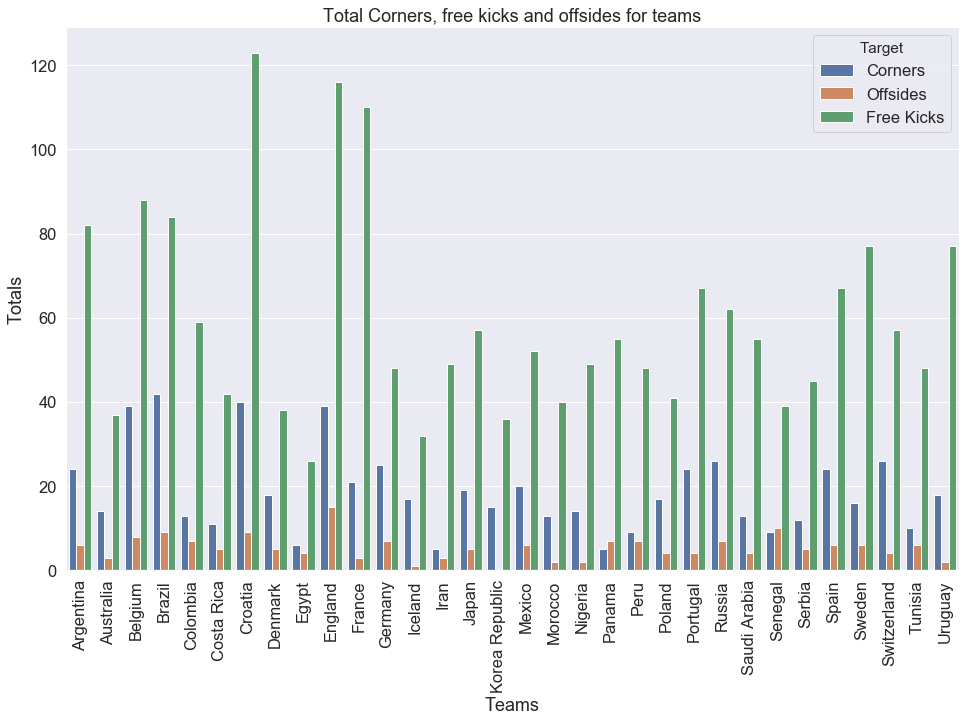

In [28]:
corners_offsides_freekicks = data.groupby('Team')['Corners','Offsides','Free Kicks'].sum().reset_index()
corners_offsides_freekicks_sort = corners_offsides_freekicks.melt('Team', var_name='Target', value_name='Value')
plt.figure(figsize = (16, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Value", hue="Target", data=corners_offsides_freekicks_sort)
plot1.set_xticklabels(corners_offsides_freekicks_sort['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Totals')
plot1.set_title('Total Corners, free kicks and offsides for teams')


Text(0.5, 1.0, 'Total goals conceded')

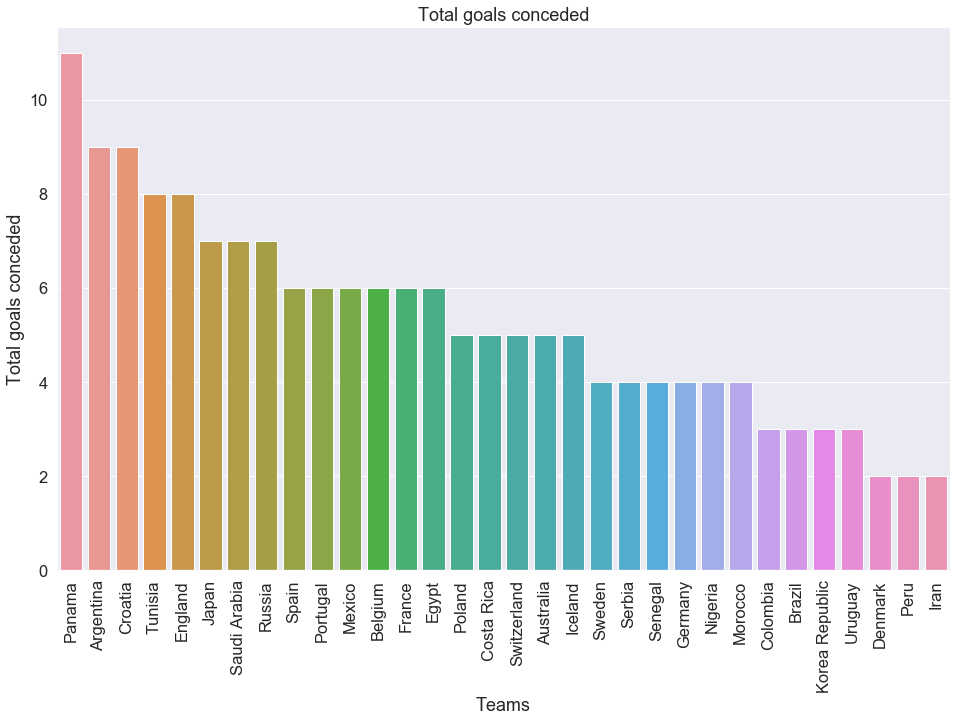

In [29]:
goals_conceded = data.groupby('Opponent')['Goal Scored'].sum().reset_index().sort_values(by=('Goal Scored'), ascending=False)
plt.figure(figsize = (16, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Opponent", y="Goal Scored", data=goals_conceded)
plot1.set_xticklabels(goals_conceded['Opponent'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total goals conceded')
plot1.set_title('Total goals conceded')

Text(0.5, 1.0, 'Total yellow cards')

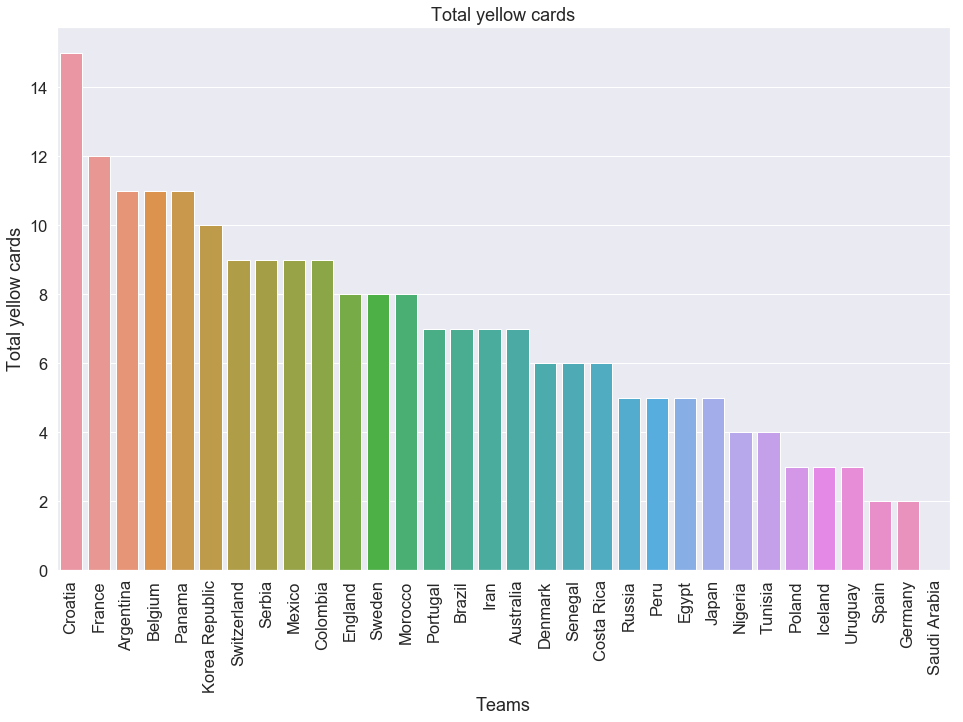

In [30]:
yellow_cards = data.groupby('Team')['Yellow Card'].sum().reset_index().sort_values(by=('Yellow Card'), ascending=False)
plt.figure(figsize = (16, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Yellow Card", data=yellow_cards)
plot1.set_xticklabels(yellow_cards['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total yellow cards')
plot1.set_title('Total yellow cards')


In [31]:
skew_values = skew(data[numerical_features], nan_policy = 'omit')
pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']),pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis =1)

,Features,Skewness degree
0,Goal Scored,1.132232
1,Ball Possession %,0.002204
2,Attempts,0.645828
3,On-Target,0.792629
4,Off-Target,0.279919
5,Blocked,0.942771
6,Corners,0.302464
7,Offsides,0.819830
8,Free Kicks,0.098830
9,Saves,0.934101


In [33]:
missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missingvalues', '% Missing'])

,Missingvalues,% Missing
Own goal Time,116,90.6250
Own goals,116,90.6250
1st Goal,34,26.5625
Free Kicks,0,0.0000
Team,0,0.0000
Opponent,0,0.0000
Goal Scored,0,0.0000
Ball Possession %,0,0.0000
Attempts,0,0.0000
On-Target,0,0.0000


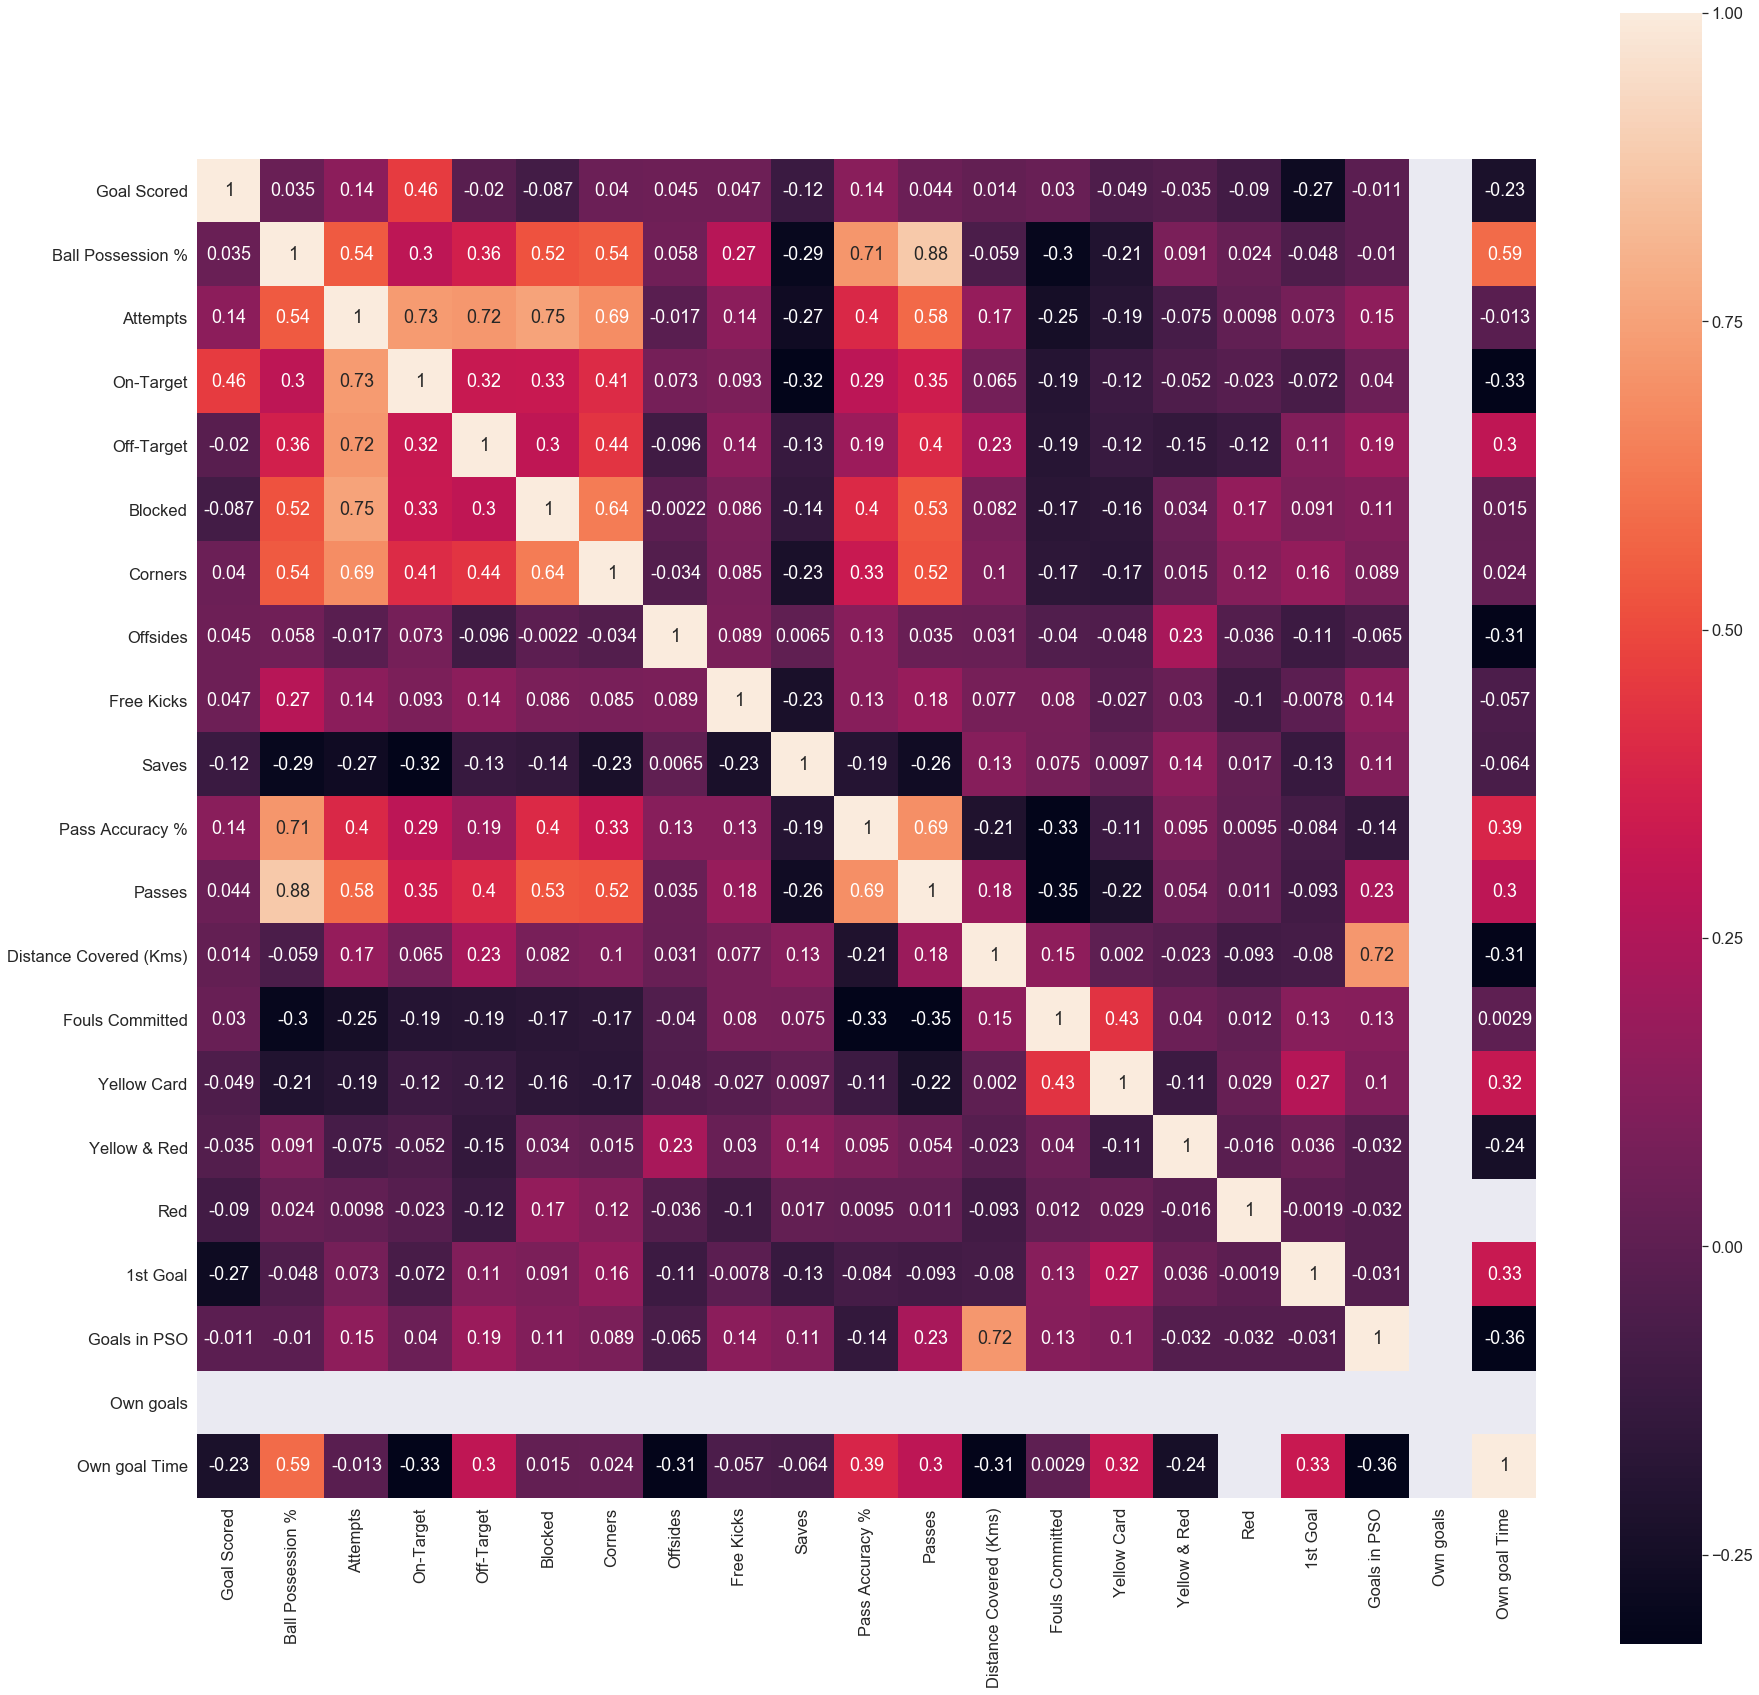

In [34]:
plt.figure(figsize=(30,30))
sns.heatmap(data[numerical_features].corr(), square=True, annot=True,robust=True, yticklabels=1)

In [37]:
var = ['Goal Scored', 'On-Target', 'Corners', 'Attempts', 'Free Kicks', 'YellowCard', 'Red', 'Fouls Committed', 'Own goal Time']
plt.figure(figsize=(15,10)) 
sns.heatmap((data[var].corr()), annot=True)

KeyError: "['YellowCard'] not in index"

<Figure size 1080x720 with 0 Axes>

In [38]:
data.drop(['Own goal Time', 'Own goals', '1st Goal'], axis = 1, inplace= True)


In [48]:
def uniqueCategories(x):
 columns = list(x.columns).copy()
 for col in columns:
     print('Feature {} has {} unique values: {}'.format(col, len(x[col].unique()), x[col].unique()))
     print('\n')
uniqueCategories(data[categorical_features].drop('Date', axis = 1))
data.drop('Date', axis = 1, inplace=True)
Feature Team has 32 unique values: ['Russia''Saudi Arabia''Egypt''Uruguay''Morocco''Iran''Portugal''Spain''France''Australia''Argentina''Iceland''Peru''Denmark''Croatia''Nigeria''Costa Rica''Serbia''Germany''Mexico' 'Brazil''Switzerland''Sweden''Korea Republic''Belgium''Panama''Tunisia''England''Colombia''Japan''Poland''Senegal']
Feature Opponent has 32 unique values: ['Saudi Arabia''Russia''Uruguay''Egypt''Iran''Morocco''Spain''Portugal''Australia''France''Iceland''Argentina''Denmark''Peru''Nigeria''Croatia''Serbia''Costa Rica''Mexico''Germany''Switzerland''Brazil''Korea Republic''Sweden''Panama''Belgium''England''Tunisia''Japan''Colombia''Senegal''Poland']
Feature Man of the Match has 2 unique values: [1 0]
Feature Round has 6 unique values: ['Group Stage' 'Round of 16' 'Quarter Finals''Semi- Finals' '3rd Place''Final']
Feature PSO has 2 unique values: ['No' 'Yes']

SyntaxError: invalid syntax (<ipython-input-48-2e1c3fedf6db>, line 8)

In [49]:
cleaned_data = pd.get_dummies(data)
print(cleaned_data.shape)
print(cleaned_data.head())


(128, 116)
   Goal Scored  Ball Possession %  Attempts  On-Target  Off-Target  Blocked  \
0            5                 40        13          7           3        3   
1            0                 60         6          0           3        3   
2            0                 43         8          3           3        2   
3            1                 57        14          4           6        4   
4            0                 64        13          3           6        4   

   Corners  Offsides  Free Kicks  Saves   ...     Opponent_Tunisia  \
0        6         3          11      0   ...                    0   
1        2         1          25      2   ...                    0   
2        0         1           7      3   ...                    0   
3        5         1          13      3   ...                    0   
4        5         0          14      2   ...                    0   

   Opponent_Uruguay  Round_3rd Place  Round_Final  Round_Group Stage  \
0                 0  

In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score, classification_report, confusion_matrix, precision_recall_curve
df = cleaned_data.copy()
df.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Opponent_Tunisia,Opponent_Uruguay,Round_3rd Place,Round_Final,Round_Group Stage,Round_Quarter Finals,Round_Round of 16,Round_Semi- Finals,PSO_No,PSO_Yes
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,0.023438,0.039062,0.015625,0.015625,0.750000,0.062500,0.125000,0.031250,0.937500,0.062500
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,0.151883,0.194505,0.124507,0.124507,0.434714,0.243013,0.332018,0.174676,0.243013,0.243013
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
from sklearn.model_selection import train_test_split
data_train,data_test,label_train,label_test = train_test_split(features, targetfet, test_size = 0.2, random_state = 42)

NameError: name 'features' is not defined

In [54]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(data_train, label_train)
logis_score_train = logis.score(data_train, label_train)
print("Training score: ",logis_score_train)
logis_score_test = logis.score(data_test, label_test)
print("Testing score: ",logis_score_test)

NameError: name 'data_train' is not defined

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(data_train,label_train)
rfc_score_train = rfc.score(data_train, label_train)
print("Training score: ",rfc_score_train)
rfc_score_test = rfc.score(data_test, label_test)
print("Testing score: ",rfc_score_test)
models = pd.DataFrame({'Model' : ['Logistic Regression', 'Random Forest'],'Training_Score' : [logis_score_train, rfc_score_train],'Testing_Score' : [logis_score_test, rfc_score_test]})
models.sort_values(by='Testing_Score', ascending=False)

NameError: name 'data_train' is not defined